Importy

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# pd.set_option('display.max_rows', 15)

Wczytanie danych

In [98]:
df = pd.read_excel('Dataset20_21.xlsx')
df.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8


In [99]:
len(df)

2075

Zostawiamy tylko piłkarzy, którzy zagrali powyżej 15 meczów

In [100]:
df_15 = df[df['MP (20/21)'] > 15]
df_15.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8


Wykres rozkładu wartości piłkarzy

Text(0, 0.5, 'Count')

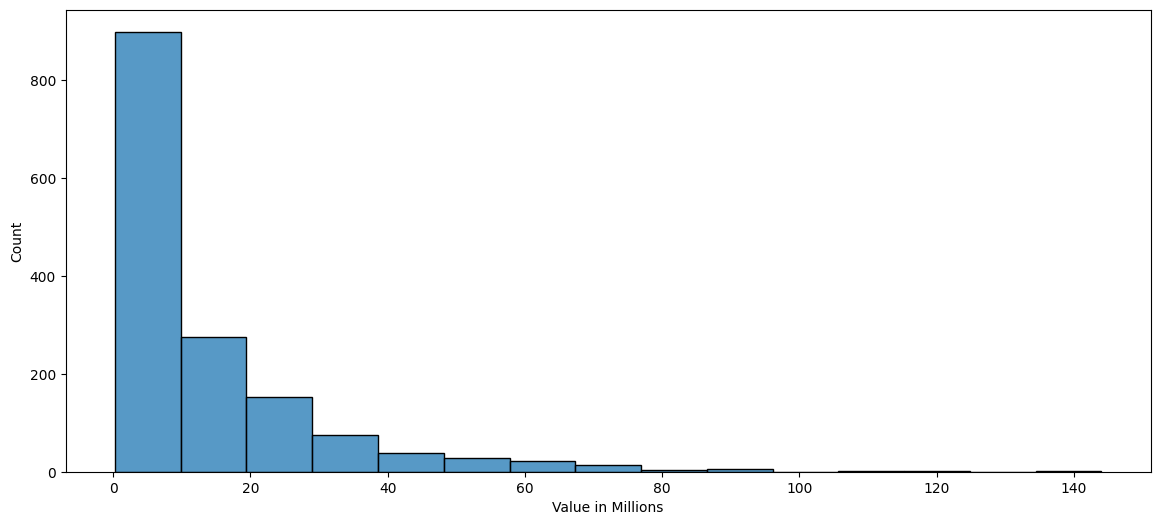

In [101]:
plt.figure(figsize=(14,6))
sns.histplot(df_15['Value'].mul(0.000001), bins=15)  # zamiana na miliony
plt.xlabel("Value in Millions")
plt.ylabel("Count")

In [102]:
df_15['Age'].value_counts() # rozkład wieku

Age
24    145
26    134
27    129
28    126
25    126
29    121
23    115
30    107
31     86
22     83
21     66
32     60
33     57
34     53
20     27
19     18
35     18
36     14
18     11
37      7
38      5
39      3
40      1
Name: count, dtype: int64

Wykres korelacji wieku do wartości piłkarzy

<Axes: xlabel='Age', ylabel='Avg Value in Millions'>

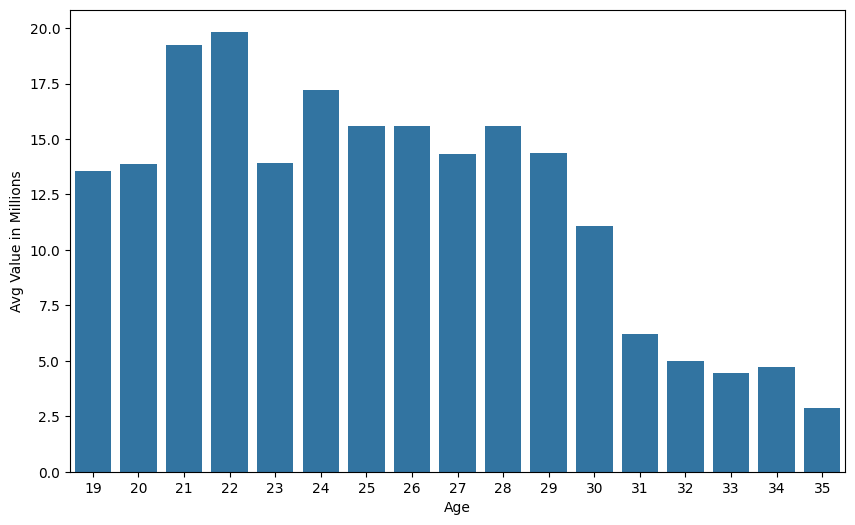

In [103]:
# usuwamy wartości, które występują mniej niż 15 razy
counts = df_15['Age'].value_counts()
tempdf = df_15[~df_15['Age'].isin(counts[counts < 15].index)]

# daatframe sredniej wartosci na kazdy wiek
tempdf = tempdf.groupby('Age')['Value'].mean()


# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() # zamiana na miliony

plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Avg Value in Millions', data=tempdf)

Korelacja pozycji do wartości piłkarzy

In [104]:
df_15['Position'].value_counts()

Position
Defender      516
midfield      465
attack        432
Goalkeeper     99
Name: count, dtype: int64

<Axes: xlabel='Position', ylabel='Avg Value in Millions'>

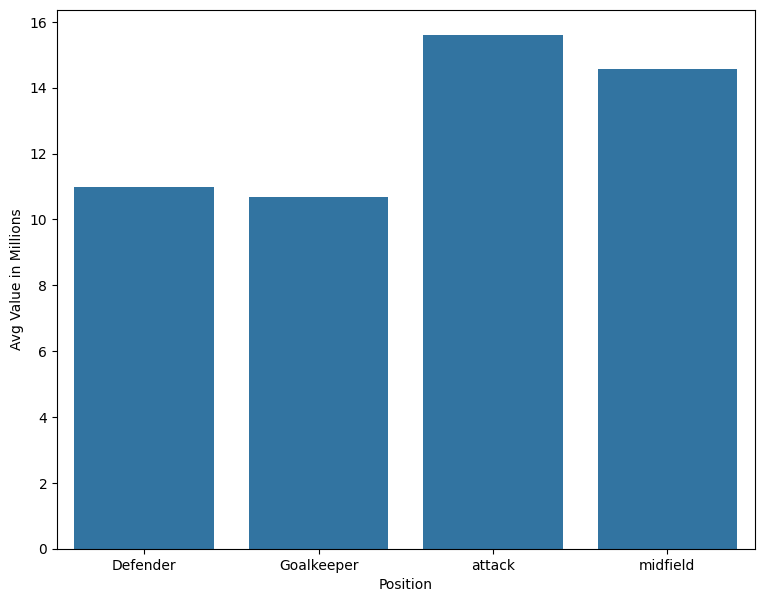

In [105]:
# dataframe ze srednia wartoscia dla kazdej pozycji
tempdf = df_15.groupby('Position')['Value'].mean()

# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() # zamiana na miliony

plt.figure(figsize=(9,7))
sns.barplot(x='Position', y='Avg Value in Millions', data=tempdf)

Korelacja ligi i wartości piłkarzy

In [106]:

df_15['League'].value_counts()

League
Serie A           324
La Liga           322
Premier League    321
Ligue 1           280
Bundesliga        265
Name: count, dtype: int64

<Axes: xlabel='League', ylabel='Avg Value in Millions'>

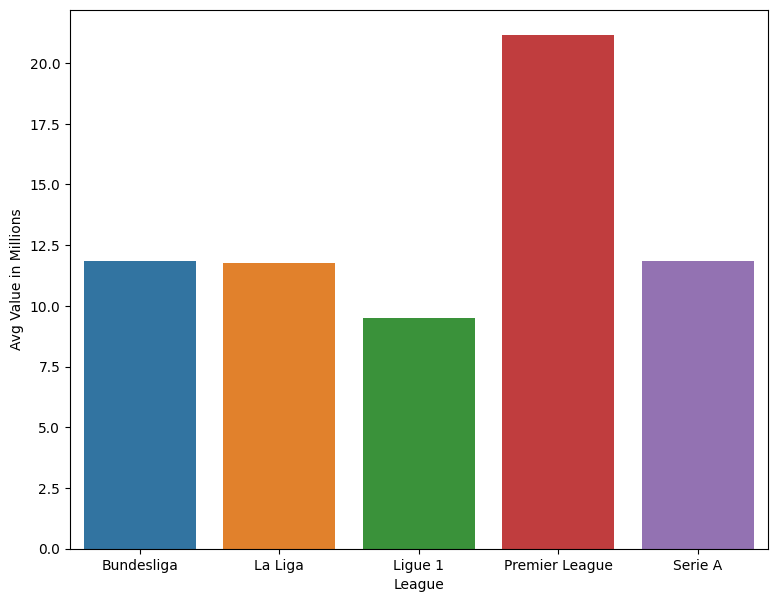

In [107]:
# dataframe ze srednia wartoscia dla kazdej ligi
tempdf = df_15.groupby('League')['Value'].mean()

# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() # znow na miliony, moze jednak lepiej bylo podzielic to na poczatku

plt.figure(figsize=(9,7))
sns.barplot(x='League', y='Avg Value in Millions', hue='League', data=tempdf )

Korelacja lat do konca kontraktu i wartości piłkarzy

In [108]:
df_15['Contract Years Left'].value_counts()

Contract Years Left
2       423
3       386
1       376
4       208
5        74
fail     30
6        12
7         1
10        1
0         1
Name: count, dtype: int64

<Axes: xlabel='Contract Years Left', ylabel='Avg Value in Millions'>

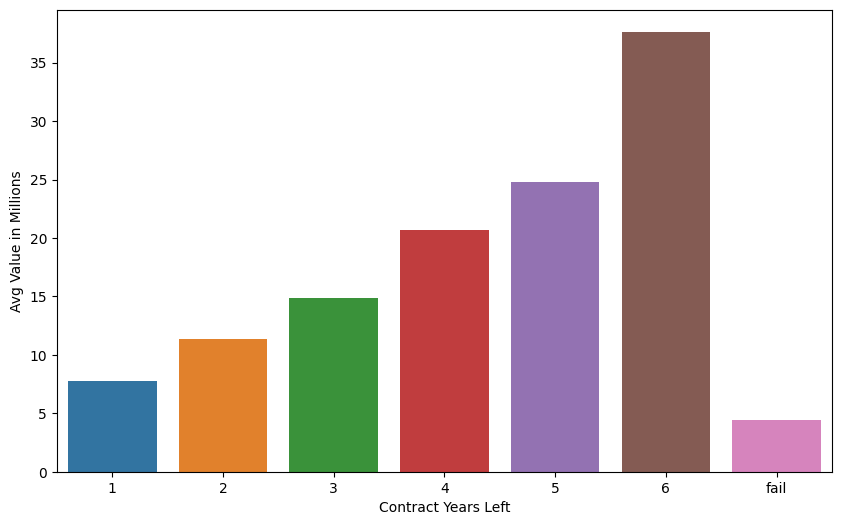

In [109]:
# bierzemy tylko takie kontrakty, które występują więcej niż 5 razy, bo przykladowo pilkarz ktory ma kontarkt na 10 lat,
# jest nie dokupienia, a wystepuje tylko raz, nie wnoszac nic do analizy 
counts = df_15['Contract Years Left'].value_counts()
tempdf = df_15[~df_15['Contract Years Left'].isin(counts[counts < 5].index)]

# dataframe ze srednia wartoscia dla kazdej ilosci lat w kontrakcie
tempdf = tempdf.groupby('Contract Years Left')['Value'].mean()

# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() 

plt.figure(figsize=(10,6))
sns.barplot(x='Contract Years Left', y='Avg Value in Millions', hue='Contract Years Left', data=tempdf, legend=False)

Korelacja miedzy krajem a wartością piłkarzy

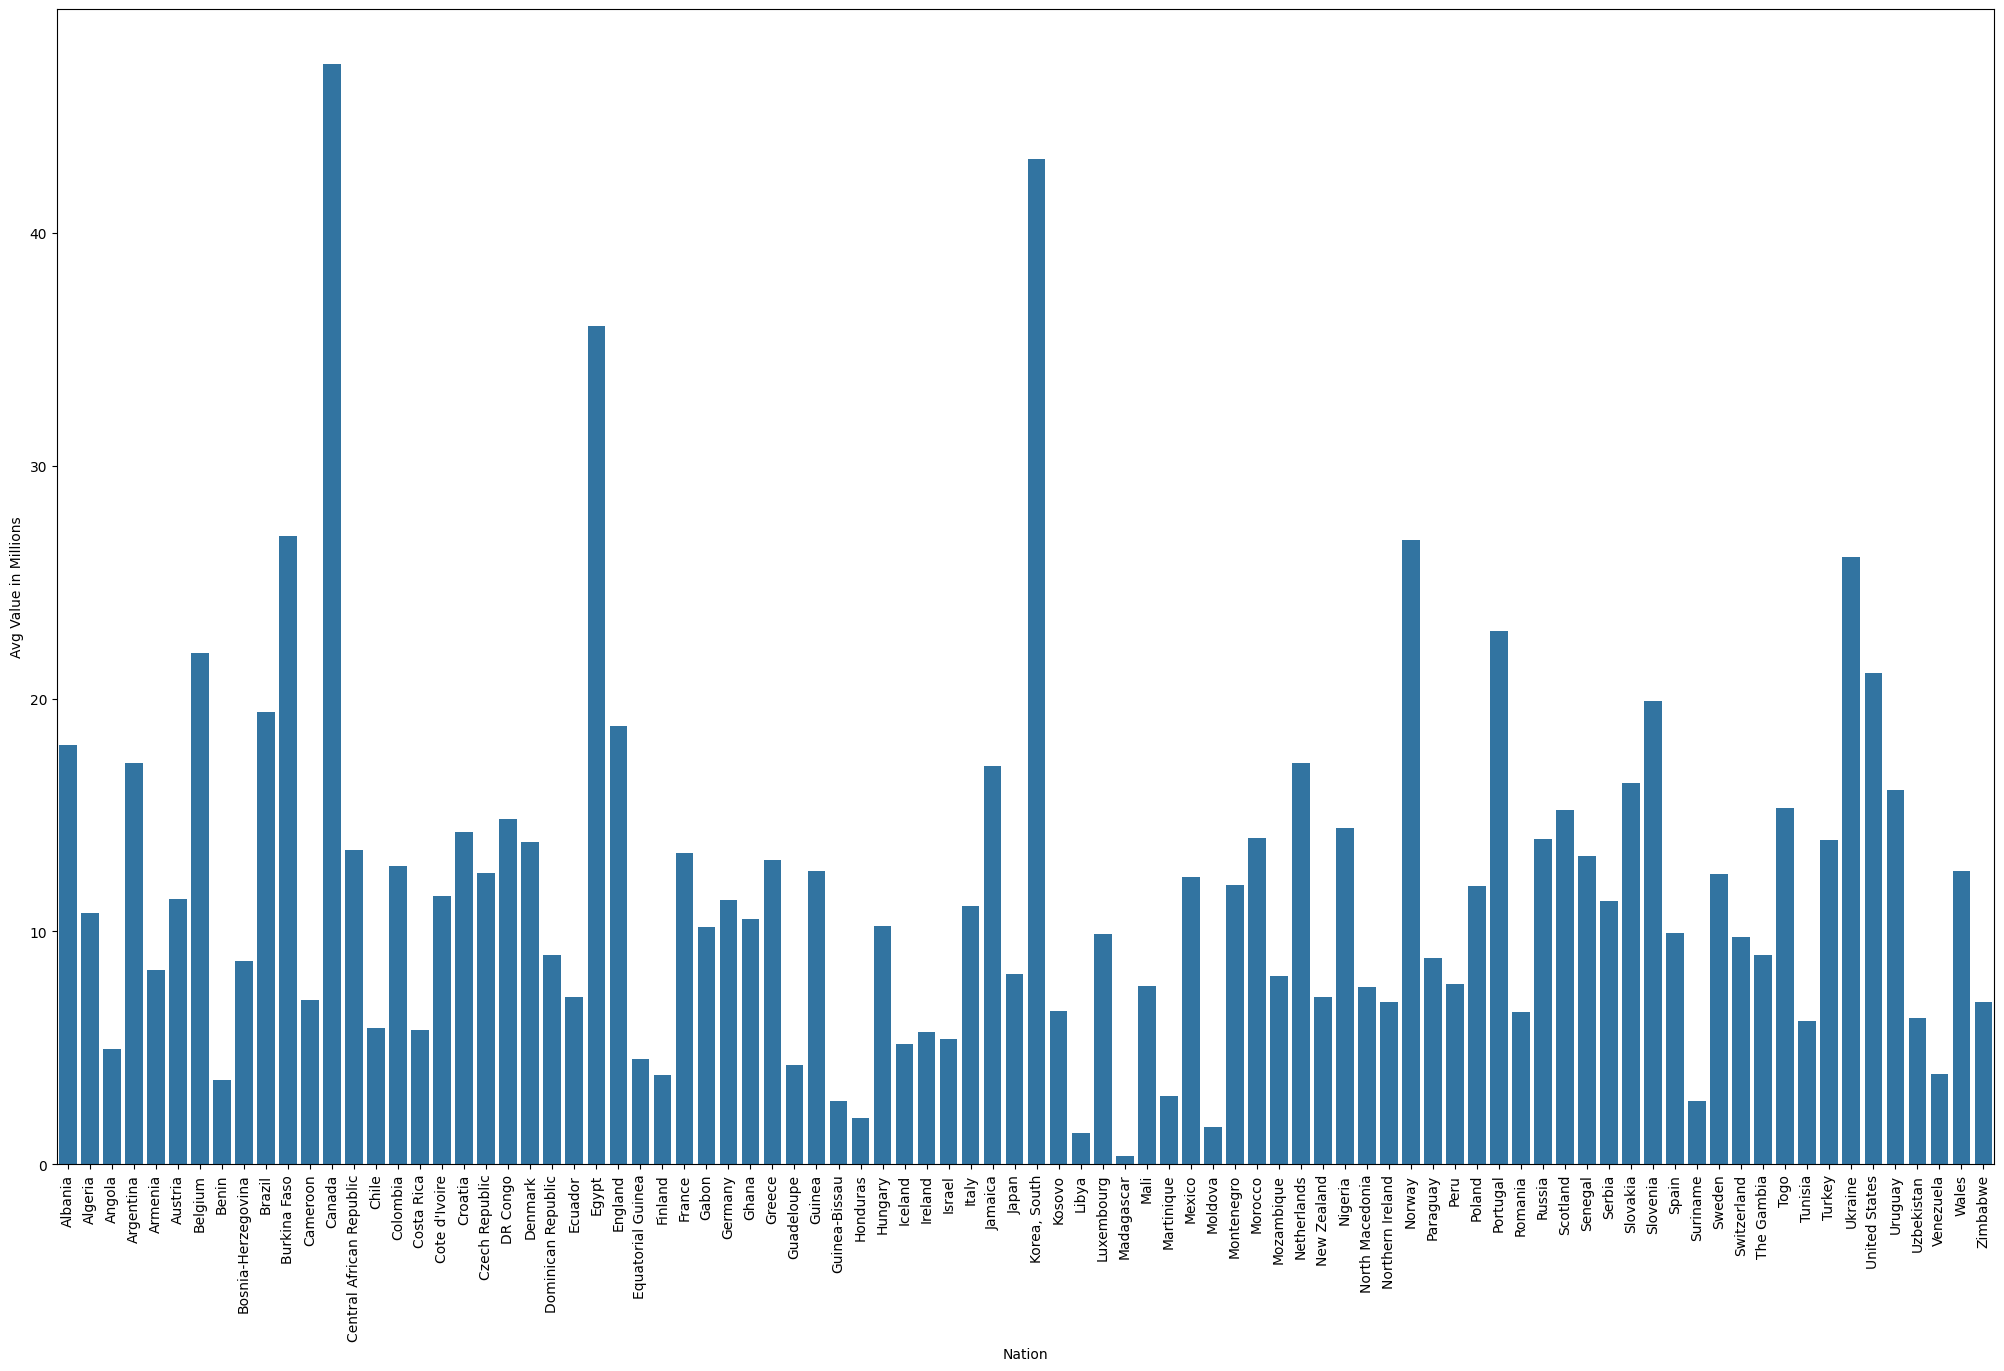

In [110]:
# df ze srednia wartoscia dla kazdego narodu
tempdf = df_15.groupby('Nation')['Value'].mean()

# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() 

plt.figure(figsize=(25,15))
sns.barplot(x='Nation', y='Avg Value in Millions', data=tempdf)
xticks = plt.xticks(rotation=90)

Korelacja miedzy gole + asysty na 90 minut, a wartoscią napastników

Text(0.5, 0, 'Goals + Assists per 90 mins (Attackers)')

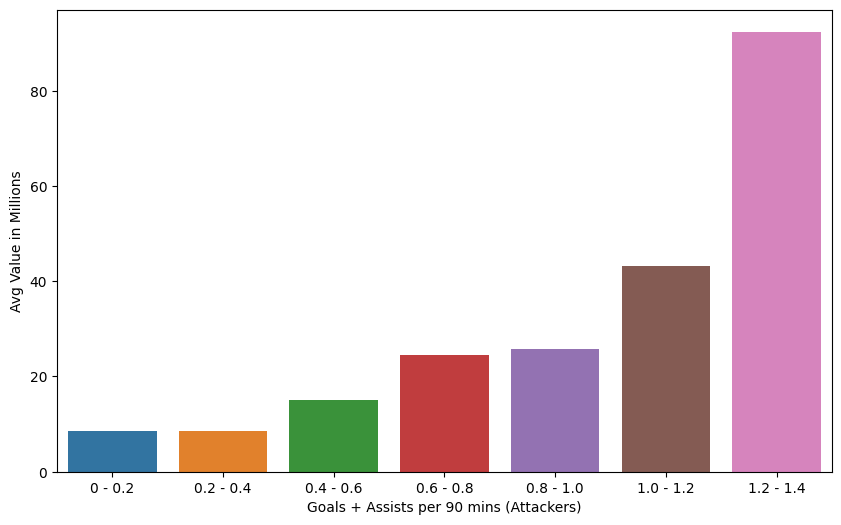

In [111]:
# df dla napastnikow
df_attack = df_15[df_15['Position'] == 'attack'].copy()

# cutujemy dane na 7 przedzialow
bins = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
group_names = ['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0 - 1.2', '1.2 - 1.4']
df_attack['Cuts'] = pd.cut(df_attack['(G+A)/90 (20/21)'], bins, labels=group_names)

# wykres
tempdf = df_attack.groupby('Cuts', observed=True)['Value'].mean()
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() 



plt.figure(figsize=(10,6))
sns.barplot(x='Cuts', y='Avg Value in Millions', hue='Cuts', data=tempdf)
plt.xlabel("Goals + Assists per 90 mins (Attackers)")

Zostawiam tylko kolumny numeryczne i usuwam rekordy z brakujacymi danymi

In [112]:
df_numeric = df_15.select_dtypes(include=['number'])
# df_numeric = df_numeric.dropna()

Kolumny posortowane od najsilniejszej korelacji z Value

In [113]:
x = pd.DataFrame(df_numeric.corr()['Value'])
x

,Value
Age,-0.264730
Value,1.000000
MP (20/21),0.238468
Starts (20/21),0.261085
Min (20/21),0.265660
...,...
Own Goals (20/21),-0.008410
Total Loose Balls Recovered (20/21),0.151138
Aerial Duel Won (20/21),0.035300
Aerial Duel Lost (20/21),0.063955


In [114]:
x = x.sort_values('Value', ascending=False) 
x = x[x['Value']>0.4]
x


,Value
Value,1.000000
Goal Creating Actions (20/21),0.486852
Number of Times Player was Pass Target (20/21),0.484844
Passes Leading to Goals (20/21),0.478690
Total Carries in Forward Direction (20/21),0.478071
Non-penalty xG+ xA (20/21),0.475322
Passes Leading to Shot Attempt (20/21),0.467209
Touches in Attacking Penalty Box (20/21),0.460145
Shot-Creating Actions (20/21),0.450528
Carries into Attacking Penalty Box (20/21),0.448627


<Axes: >

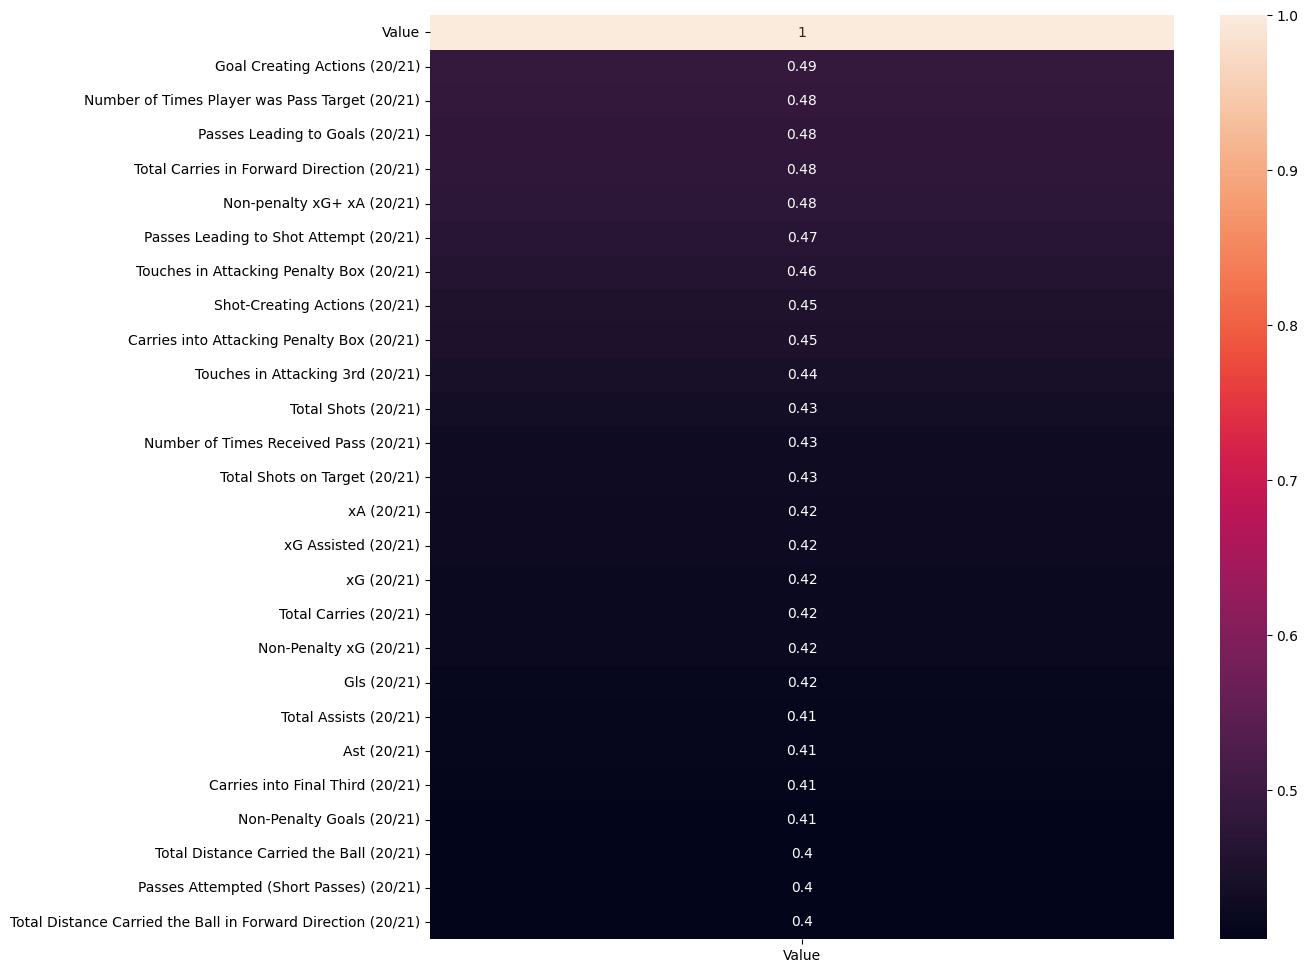

In [115]:
# wykres
plt.figure(figsize=(12,12))
sns.heatmap(data=x.sort_values('Value', ascending=False), annot=True)

In [116]:
df_15.columns[df_15.isnull().sum() > 0].tolist() # kolumny z brakujacymi wartosciami

['Shots on Target% (20/21)',
 'Goals/Shots (20/21)',
 'Goals/Shots on Target (20/21)',
 'Avg Shot Distance (yds) (20/21)',
 'Non-Penalty xG/Shots (20/21)',
 'Dribble Success % (20/21)',
 'Pass Completion % (Long Passes) (20/21)',
 '% of Dribblers Tackled (20/21)',
 'Successful Pressure % (20/21)',
 '% Aerial Duels Won (20/21)']

Usuwamy kolumny z brakujacymi danymi i te nienumeryczne

In [117]:
df_ML = df_15.drop(['Shots on Target% (20/21)',
 'Goals/Shots (20/21)',
 'Goals/Shots on Target (20/21)',
 'Avg Shot Distance (yds) (20/21)',
 'Non-Penalty xG/Shots (20/21)',
 'Dribble Success % (20/21)',
 'Pass Completion % (Long Passes) (20/21)',
 '% of Dribblers Tackled (20/21)',
 'Successful Pressure % (20/21)',
 '% Aerial Duels Won (20/21)',
 'Player',
 'Nation',
 'Squad (20/21)'], axis=1)

df_ML['Club'].unique() # lista klubow

array(['Paris Saint-Germain', 'Borussia Dortmund', 'Tottenham Hotspur',
       'Manchester United', 'Liverpool FC', 'Manchester City',
       'Chelsea FC', 'Bayern Munich', 'FC Barcelona',
       'Atlético de Madrid', 'Inter Milan', 'Juventus FC',
       'Real Sociedad', 'SS Lazio', 'Real Madrid', 'West Ham United',
       'Arsenal FC', 'Sevilla FC', 'Leicester City', 'AC Milan',
       'Everton FC', 'RB Leipzig', 'Villarreal CF', 'SSC Napoli',
       'Bayer 04 Leverkusen', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Olympique Lyon', 'AS Roma', 'Valencia CF', 'ACF Fiorentina',
       'Leeds United', 'Olympique Marseille', 'Aston Villa',
       'US Sassuolo', 'Borussia Mönchengladbach', 'Eintracht Frankfurt',
       'LOSC Lille', 'Atalanta BC', 'AS Monaco', 'Torino FC',
       'Southampton FC', 'VfL Wolfsburg', 'OGC Nice', 'Newcastle',
       'TSG 1899 Hoffenheim', 'Stade Rennais FC', 'Burnley FC',
       'Brighton &amp; Hove Albion', 'VfB Stuttgart',
       'Real Betis Balompi

Sortujemy kluby po najwyzszej sredniej wartosci rynkowej i zrobimy 4 kategorie

In [118]:
x = df_ML.groupby('Club')['Value'].mean().sort_values(ascending=False)
y = pd.DataFrame(x)
z = y.reset_index()        
z['Club'].to_list()

['Manchester City',
 'Liverpool FC',
 'Bayern Munich',
 'Manchester United',
 'Paris Saint-Germain',
 'Chelsea FC',
 'Atlético de Madrid',
 'FC Barcelona',
 'Tottenham Hotspur',
 'Real Madrid',
 'Juventus FC',
 'Borussia Dortmund',
 'Inter Milan',
 'SSC Napoli',
 'RB Leipzig',
 'Arsenal FC',
 'Leicester City',
 'Everton FC',
 'Wolverhampton Wanderers',
 'Aston Villa',
 'AC Milan',
 'AS Roma',
 'Sevilla FC',
 'Real Sociedad',
 'West Ham United',
 'Atalanta BC',
 'Borussia Mönchengladbach',
 'AS Monaco',
 'Bayer 04 Leverkusen',
 'LOSC Lille',
 'Olympique Lyon',
 'Leeds United',
 'Villarreal CF',
 'SS Lazio',
 'VfL Wolfsburg',
 'Olympique Marseille',
 'ACF Fiorentina',
 'Valencia CF',
 'Brighton &amp; Hove Albion',
 'Southampton FC',
 'OGC Nice',
 'Crystal Palace',
 'Stade Rennais FC',
 'Newcastle',
 'TSG 1899 Hoffenheim',
 'Eintracht Frankfurt',
 'US Sassuolo',
 'Athletic Bilbao',
 'Real Betis Balompié',
 'Fulham FC',
 'VfB Stuttgart',
 'Celta de Vigo',
 'Getafe CF',
 'Bologna FC 1909',


In [119]:
Tier1 = ['Manchester City', 'Liverpool FC', 'Bayern Munich', 'Manchester United', 'Paris Saint-Germain', 'Chelsea FC',
         'FC Barcelona', 'Real Madrid']
Tier2 = ['Atlético de Madrid', 'Tottenham Hotspur', 'Juventus FC', 'Borussia Dortmund', 'Inter Milan', 'SSC Napoli', 
         'RB Leipzig', 'Arsenal FC', 'Leicester City', 'Everton FC', 'Wolverhampton Wanderers', 'Aston Villa', 
         'AC Milan', 'AS Roma','Sevilla FC']
Tier3 = ['Real Sociedad','West Ham United','Atalanta BC','Borussia Mönchengladbach', 'AS Monaco','Bayer 04 Leverkusen',
         'LOSC Lille','Olympique Lyon','Leeds United','Villarreal CF','SS Lazio','VfL Wolfsburg','Olympique Marseille',
         'ACF Fiorentina','Valencia CF','Brighton &amp; Hove Albion','Southampton FC','OGC Nice']
Tier4 = ['Crystal Palace', 'Stade Rennais FC','Newcastle','TSG 1899 Hoffenheim','Eintracht Frankfurt','US Sassuolo',
         'Athletic Bilbao','Real Betis Balompié','Fulham FC','VfB Stuttgart','Celta de Vigo','Getafe CF','Bologna FC 1909',
         'Burnley FC','Cagliari','Torino FC','SC Freiburg','Hertha BSC','Montpellier HSC','UC Sampdoria','RC Lens',
         'Hellas Verona','Stade Reims','RC Strasbourg Alsace','1.FSV Mainz 05','West Bromwich Albion','AS Saint-Étienne',
         'Sheffield United','Levante UD','FC Augsburg','Udinese Calcio','FC Metz','Granada CF','1. FC Köln','Stade Brestois 29',
         'FC Nantes','Deportivo Alavés','FC Girondins Bordeaux','SV Werder Bremen','CA Osasuna','Spezia Calcio',
         '1.FC Union Berlin','SCO Angers','Parma Calcio 1913','Genoa CFC','Nîmes Olympique','FC Lorient','FC Schalke 04',
         'Real Valladolid CF','Arminia Bielefeld','Cádiz CF','Elche CF','SD Eibar','Dijon FCO','Benevento Calcio',
         'FC Crotone','SD Huesca']

df_ML['Club'] = df_ML['Club'].replace(Tier1, 1)
df_ML['Club'] = df_ML['Club'].replace(Tier2, 2)
df_ML['Club'] = df_ML['Club'].replace(Tier3, 3)
df_ML['Club'] = df_ML['Club'].replace(Tier4, 4)

df_ML

,Club,Age,Position,Value,Contract Years Left,League,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,1,22,attack,144000000,1,Ligue 1,31.0,27.0,2380.0,26.4,...,38.0,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0
1,2,21,attack,117000000,3,Bundesliga,28.0,27.0,2407.0,26.7,...,22.0,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0
2,2,28,attack,108000000,3,Premier League,35.0,35.0,3082.0,34.2,...,60.0,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0
3,1,21,attack,90000000,5,Premier League,26.0,24.0,2062.0,22.9,...,22.0,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0
4,1,29,attack,90000000,2,Premier League,37.0,34.0,3078.0,34.2,...,22.0,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,4,31,Defender,360000,2,La Liga,19.0,12.0,1191.0,13.2,...,9.0,0.0,17.0,21.0,0.0,0.0,0.0,119.0,24.0,11.0
2042,4,38,Goalkeeper,315000,2,Ligue 1,24.0,24.0,2160.0,24.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,100.0,0.0,0.0
2049,4,35,midfield,270000,1,Ligue 1,30.0,10.0,1130.0,12.6,...,24.0,0.0,32.0,8.0,0.0,0.0,0.0,72.0,3.0,17.0
2058,4,36,midfield,270000,1,La Liga,32.0,27.0,2183.0,24.3,...,21.0,3.0,26.0,20.0,0.0,0.0,0.0,205.0,14.0,28.0


Mapowanie wartosci tekstowych na numeryczne

In [120]:
df_ML['Position'] = df_ML['Position'].map({'attack': 1, 'midfield': 2, 'Defender': 3, 'Goalkeeper': 4})
df_ML['League'] = df_ML['League'].map({'Ligue 1': 1, 'Bundesliga': 2, 'Premier League': 3, 'La Liga': 4, 'Serie A': 5})

In [121]:
df_ML = df_ML[df_ML['Contract Years Left'] != 'fail'] # usuwamy te co fail bylo
df_ML['Contract Years Left'] = df_ML['Contract Years Left'].astype(float) # zamiana na float
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1482 entries, 0 to 2060
Columns: 130 entries, Club to Aerial Duel Lost (20/21)
dtypes: float64(125), int64(5)
memory usage: 1.5 MB


C:\Users\solsz\AppData\Local\Temp\ipykernel_20088\3640099004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Contract Years Left'] = df_ML['Contract Years Left'].astype(float) # zamiana na float


In [122]:
df_ML.columns.to_list()

['Club',
 'Age',
 'Position',
 'Value',
 'Contract Years Left',
 'League',
 'MP (20/21)',
 'Starts (20/21)',
 'Min (20/21)',
 'Total Mins/90 (20/21)',
 'Gls (20/21)',
 'Ast (20/21)',
 'Non-Penalty Goals (20/21)',
 'Penalties Scored (20/21)',
 'Penalties Attempted (20/21)',
 'Yellow Cards (20/21)',
 'Red Cards (20/21)',
 'Gls/90 (20/21)',
 'Ast/90 (20/21)',
 '(G+A)/90 (20/21)',
 'Non-Penalty Goals/90 (20/21)',
 '(Gls+Ast-Scored Penalties)/90 (20/21)',
 'xG (20/21)',
 'Non-Penalty xG (20/21)',
 'xA (20/21)',
 'Non-penalty xG+ xA (20/21)',
 'xG/90 (20/21)',
 'xA/90 (20/21)',
 '(xG+xA)/90 (20/21)',
 'Non-Penalty xG/90 (20/21)',
 '(Non-Penalty xG+xA)/90 (20/21)',
 'Total Shots (20/21)',
 'Total Shots on Target (20/21)',
 'Shots/90 (20/21)',
 'Shots on Target/90 (20/21)',
 'Freekick Shots (20/21)',
 'Goals Scored minus xG (20/21)',
 'Non-Penalty Goals Scored minus Non-Penalty xG (20/21)',
 'Shot-Creating Actions (20/21)',
 'Shot-Creating Actions/90 (20/21)',
 'Passes Leading to Shot Attempt 

Rozkłady prawdopodobieństwa dla wszystkich kolumn

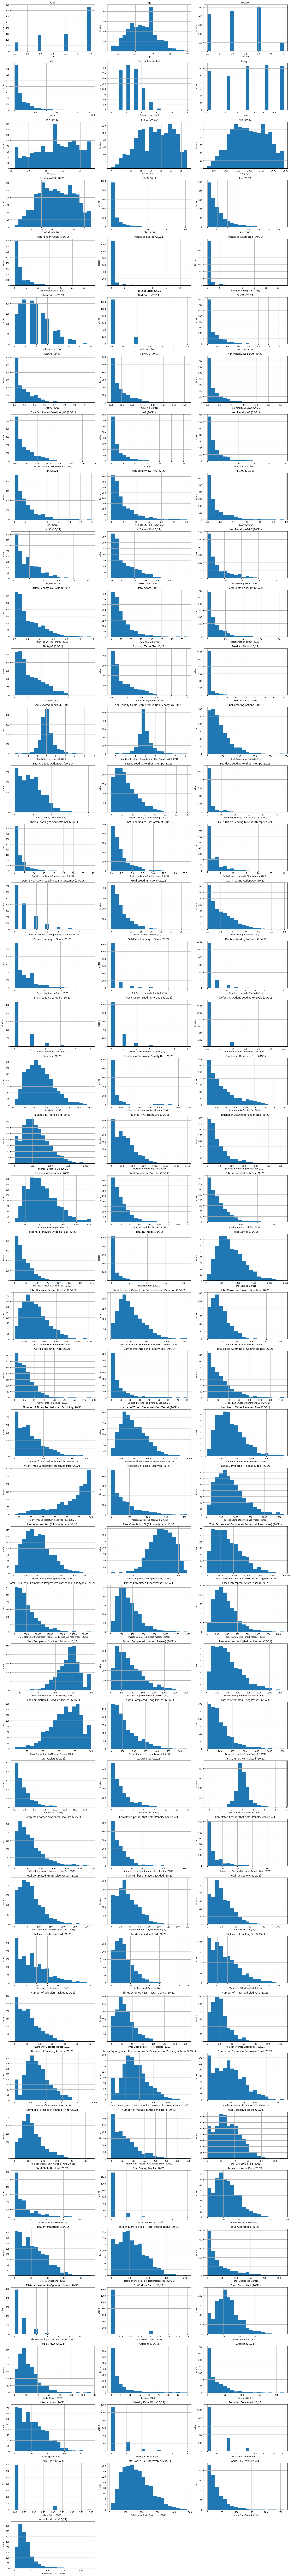

In [123]:

# Liczba kolumn w DataFrame
num_columns = len(df_ML.columns)

# Ustawienia siatki wykresów
num_rows = math.ceil(num_columns / 3)  # Liczba wierszy, przy założeniu 3 kolumn w siatce
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 4 * num_rows))  # Ustawienie rozmiaru figury

# Iteracja przez wszystkie kolumny DataFrame
for i, column in enumerate(df_ML.columns):
    row = i // 3  # Określenie wiersza w siatce
    col = i % 3  # Określenie kolumny w siatce
    df_ML[column].hist(bins=20, ax=axes[row, col])  # Tworzenie histogramu w odpowiedniej komórce siatki
    axes[row, col].set_title(f'{column}')  # Dodanie tytułu do wykresu
    axes[row, col].set_xlabel(column)  # Etykieta osi X
    axes[row, col].set_ylabel('Liczba')  # Etykieta osi Y

# Usunięcie pustych wykresów, jeśli liczba kolumn nie jest wielokrotnością 3
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()  # Dopasowanie układu wykresów
plt.show()  # Wyświetlenie siatki wykresów

Standaryzacja Danych

In [124]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_ML)

Zeby zobaczyc bez standaryzacji to zakomentowac komorke wyzej i zmienic scaled_data w komorce nizej na df_ML

PCA

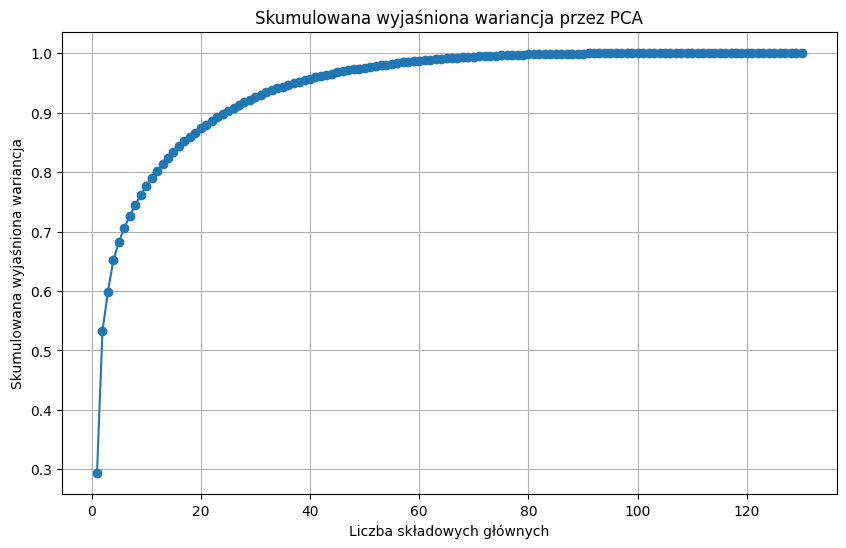

In [125]:
# Przeprowadzenie PCA
pca = PCA(n_components=None)  # Początkowo wykonujemy PCA na wszystkich komponentach
pca.fit(scaled_data)

# Obliczenie skumulowanej wariancji wyjaśnionej przez składowe główne
explained_variance = pca.explained_variance_ratio_.cumsum()

# Wybór liczby składowych głównych, które wyjaśniają np. 95% wariancji
n_components = next(x[0] for x in enumerate(explained_variance) if x[1] >= 0.95) + 1

# Przeprowadzenie PCA z wybraną liczbą komponentów
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Tworzenie DataFrame z wynikami PCA
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Wizualizacja skumulowanej wariancji wyjaśnionej
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Skumulowana wyjaśniona wariancja przez PCA')
plt.grid(True)
plt.show()

In [126]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standaryzacja danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_ML)

# Przeprowadzenie PCA
n_components = 30  # Ustalona liczba składowych wyjaśniających ponad 90% wariancji
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Tworzenie DataFrame z wynikami PCA
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Obliczanie ładunków składowych głównych
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=df_ML.columns)

# Wyświetlanie najważniejszych zmiennych dla każdej składowej głównej
num_top_variables = 5  # Liczba najważniejszych zmiennych do wyświetlenia dla każdej składowej

for i in range(n_components):
    print(f'\nNajważniejsze zmienne dla PC{i+1}:')
    print(loadings.iloc[:, i].nlargest(num_top_variables))


Najważniejsze zmienne dla PC1:
Non-penalty xG+ xA (20/21)                  0.150789
Progressive Passes Received (20/21)         0.147790
Shot-Creating Actions (20/21)               0.145377
Total Shots (20/21)                         0.144280
Touches in Attacking Penalty Box (20/21)    0.143121
Name: PC1, dtype: float64

Najważniejsze zmienne dla PC2:
Touches (20/21)                              0.169298
Touches in Open-play (20/21)                 0.168957
Passes Attempted (All pass-types) (20/21)    0.166866
Passes Completed (All pass-types) (20/21)    0.165531
Passes Attempted (Medium Passes) (20/21)     0.163768
Name: PC2, dtype: float64

Najważniejsze zmienne dla PC3:
Touches in Defensive Penalty Box (20/21)                                   0.222082
Passes Attempted (Long Passes) (20/21)                                     0.200494
Total Distance of Completed Progressive Passes (All Pass-types) (20/21)    0.198684
Passes Completed (Long Passes) (20/21)                           

Model LinearRegression

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ML.drop('Value',axis=1), 
                                                    df_ML['Value'], test_size=0.20, 
                                                   )


In [128]:
from sklearn.preprocessing import MinMaxScaler

# normalizacja

scaler = MinMaxScaler()
scaler.fit(X_train) # minmax scaler tylko dla danych treningowych
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [130]:
predictions = lm.predict(X_test)
# predictions = np.sqrt(predictions**2) # zamiana niektorych ujemynch warttości na dodatnie
predictions = np.maximum(predictions, 0) # limit zeby nie bylo ujemnych wartosci

Text(0, 0.5, 'Predicted Value in Millions')

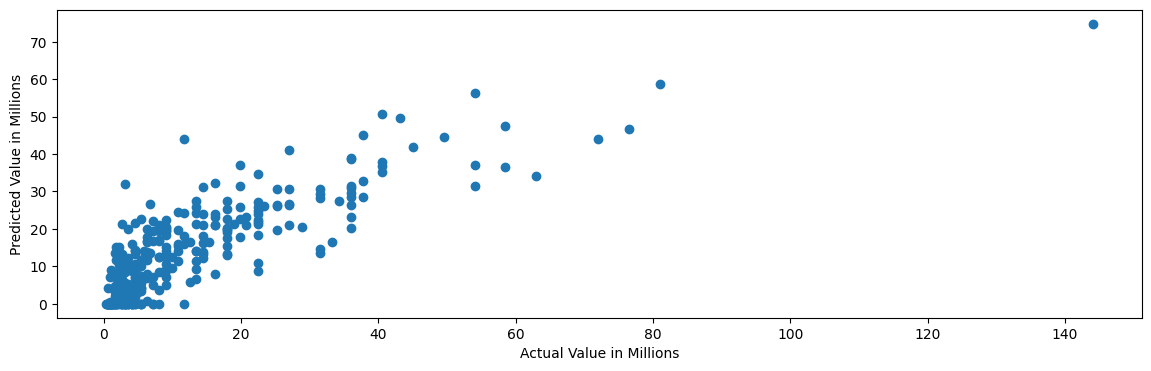

In [131]:
plt.figure(figsize=(14,4))
plt.scatter(y_test*.000001,predictions*.000001)
plt.xlabel("Actual Value in Millions")
plt.ylabel("Predicted Value in Millions")

Model OLS

In [132]:
import statsmodels.api as sm

X = df_ML.drop('Value',axis=1)
y = df_ML['Value'] 

# dodanie stałej do modelu
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     28.92
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          8.84e-290
Time:                        19:08:04   Log-Likelihood:                -25782.
No. Observations:                1482   AIC:                         5.180e+04
Df Residuals:                    1366   BIC:                         5.241e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

VIF

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from IPython.display import display, HTML

X = df_ML.drop('Value', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data["VIF"] = vif_data["VIF"].round(2)

# Convert the VIF DataFrame to HTML and display it in a scrollable window
html = vif_data.to_html()
display(HTML(f'<div style="height: 400px; overflow-y: scroll;">{html}</div>'))

c:\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Club,18.53
1,Age,74.90
2,Position,63.43
3,Contract Years Left,7.21
4,League,7.94
5,MP (20/21),117.96
6,Starts (20/21),420.34
7,Min (20/21),810030.26
8,Total Mins/90 (20/21),810160.64
9,Gls (20/21),inf


In [134]:
from IPython.display import display, HTML

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Add a constant term for the intercept
X_encoded = sm.add_constant(X_encoded)

# Fit the linear regression model
model = sm.OLS(y, X_encoded).fit()

# Get the p-values for each feature
p_values = model.pvalues

# Sort features by p-values in ascending order
p_values_sorted = p_values.sort_values().round(2)


html = p_values_sorted.to_frame().to_html()
display(HTML(f'<div style="height: 400px; overflow-y: scroll;">{html}</div>'))

,0
Club,0.00
Age,0.00
const,0.00
MP (20/21),0.00
Contract Years Left,0.00
Number of Times Player was Pass Target (20/21),0.00
Passes Leading to Goals (20/21),0.00
Min (20/21),0.00
Total Mins/90 (20/21),0.00
Crosses (20/21),0.00
